In [2]:
import pandas as pd
import numpy as np
import folium
#import math as radians, cos, sin, asin, sqrt
#from geopy.distance import geodesic


In [22]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [float(lon1), float(lat1), float(lon2), float(lat2)])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    #c = 2 * asin(sqrt(a)) 
    c = 2 * asin(sqrt(a)) * 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c

In [23]:
GPS_data = pd.read_csv('GPS_data.csv')
GPS_data.head()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


In [24]:
Acceleration_data = pd.read_csv('Acceleration_data.csv')
Acceleration_data.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


In [25]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [float(lon1), float(lat1), float(lon2), float(lat2)])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    #c = 2 * asin(sqrt(a)) 
    c = 2 * asin(sqrt(a)) 
    r=6371 # Radius of earth in kilometers. Use 3956 for miles
    return c*r  

In [26]:
#•	Distance graph (increasing from zero)
# #m = folium.Map(location = [GPS_data["latitude"].mean(),GPS_data['longitude'].mean()],zoom_start=5)
# A map of movement (Folium)
# Distance graph (increasing from zero)
# Velocity graph (calculated from coordinates)
# Acceleration graph (observed [three components] and calculated from speed [one component]).
# Note that these will be very different from each other!
# Average speed as a number
# Traveled distance as a number
# The number of steps 
# Note that calculating the velocity or distance from phone acceleration sensor data is not possible (although it sounds possible in terms of fundamental physics)! The reason is that the coordinate system is not fixed and the acceleration data is very noisy. 

# Answer the following questions:

# Does the acceleration calculated from the speed match the observed acceleration? What differences do you notice? What could be their cause?
# Is the number of steps logical?

#calculate 
lat = GPS_data['latitude']
lon = GPS_data['longitude']

GPS_data['dist'] = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. We'll calculate the distance between consecutive points there
GPS_data['time_diff']  = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. We'll calculate the time between consecutive points there
#new code
#GPS_data['velocity'] = GPS_data['dist']/GPS_data['seconds_elapsed']
#GPS_data['velocity'] = np.zeros(lat.shape[0])

for i in range(lat.shape[0]-1): #For-loop goes throught the data untill the second last row
  GPS_data['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in meters)
  GPS_data['time_diff'][i] = GPS_data['seconds_elapsed'][i+1] - GPS_data['seconds_elapsed'][i]  #The time step between data points with indices i ja i + 1 (in seconds)
  #GPS_data ['velocity_diff'][i] = GPS_data['seconds_elapsed'][i+1] - GPS_data['seconds_elapsed'][i]

GPS_data['dist'][0] = 0
GPS_data['total_distance'] = GPS_data['dist'].cumsum()
GPS_data['velocity'] = GPS_data['dist']/GPS_data['time_diff']
#new code
#GPS_data['accelection'] = np.diff(GPS_data['velocity'])/np.diff(GPS_data['seconds_elapsed'])

#GPS_data.head()
GPS_data.tail()
#這個將速度與加速度的數據加入到GPS_data中,取得所有的數據

C:\Users\Scarlett Puhakka\AppData\Local\Temp\ipykernel_30812\3186467119.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPS_data['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in meters)
C:\Users\Scarlett Puhakka\AppData\Local\Temp\ipykernel_30812\3186467119.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPS_data['time_diff'][i] = GPS_data['seconds_elapsed'][i+1] - GPS_data['seconds_elapsed'][i]  #The time step between data points with indices i ja i + 1 (in seconds)
C:\Users\Scarlett Puhakka\AppData\Local\Temp\ipykernel_30812\3186467

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_distance,velocity
217,217,131.460815,25.514726,65.069698,0.992895,0.568808,212.556663,1.745572
218,218,132.029623,25.514721,65.069689,1.044510,0.554993,213.601173,1.882024
219,219,132.584616,25.514716,65.069680,0.513124,0.554565,214.114297,0.925273
220,220,133.139181,25.514713,65.069675,1.026627,0.554565,215.140925,1.851229
221,221,133.693746,25.514709,65.069666,0.000000,0.000000,215.140925,NaN


In [27]:
lat = GPS_data['latitude']
lon = GPS_data['longitude']

GPS_data['dist'] = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. We'll calculate the distance between consecutive points there
GPS_data['time_diff']  = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. We'll calculate the time between consecutive points there


for i in range(lat.shape[0]-1): #For-loop goes throught the data untill the second last row
  GPS_data['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in meters)
  GPS_data['time_diff'][i] = GPS_data['seconds_elapsed'][i+1] - GPS_data['seconds_elapsed'][i]  #The time step between data points with indices i ja i + 1 (in seconds)
 
GPS_data['dist'][0] = 0
GPS_data['velocity'] = GPS_data['dist']/GPS_data['time_diff']
GPS_data['acceleration2'] = np.zeros(GPS_data.shape[0]) #Add new column (of zeros) to the data. We'll calculate the acceleration there
for i in range(lat.shape[0]-1):
  GPS_data['acceleration2'][i] = (GPS_data['velocity'][i+1] - GPS_data['velocity'][i])/GPS_data['time_diff'][i] #The acceleration between data points with indices i ja i + 1 (in m/s^2)

GPS_data['acceleration3']=(GPS_data['velocity'].diff())/(GPS_data['seconds_elapsed'].diff())
######
GPS_data['acceleration'] = np.zeros(GPS_data.shape[0]) 
#Add new column (of zeros) to the data. We'll calculate the acceleration there
for i in range(1, GPS_data.shape[0]):
  GPS_data['acceleration'][i] = (GPS_data['velocity'][i] - GPS_data['velocity'][i-1])/GPS_data['time_diff'][i]
GPS_data['acceleration'][0] = 0
print('The average velocity is', GPS_data['velocity'].mean(), 'm/s')
GPS_data.head()


The average velocity is 1.6782391458590495 m/s


C:\Users\Scarlett Puhakka\AppData\Local\Temp\ipykernel_30812\2029859217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPS_data['dist'][i] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i + 1 (in meters)
C:\Users\Scarlett Puhakka\AppData\Local\Temp\ipykernel_30812\2029859217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPS_data['time_diff'][i] = GPS_data['seconds_elapsed'][i+1] - GPS_data['seconds_elapsed'][i]  #The time step between data points with indices i ja i + 1 (in seconds)
C:\Users\Scarlett Puhakka\AppData\Local\Temp\ipykernel_30812\20298592

,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,total_distance,velocity,acceleration2,acceleration3,acceleration
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000,0.000000,1.456220,NaN,0.000000
1,1,5.339879,25.516227,65.071393,0.810401,0.340121,0.810401,2.382686,-1.550663,1.456220,7.005411
2,2,5.680000,25.516240,65.071398,1.171329,0.631351,1.981730,1.855274,-2.579275,-1.550663,-0.835372
3,3,6.311351,25.516264,65.071394,0.229699,1.012578,2.211429,0.226845,0.484982,-2.579275,-1.608200
4,4,7.323929,25.516267,65.071396,0.722069,1.005767,2.933498,0.717928,1.000300,0.484982,0.488267


In [28]:
#draw a map
import folium # map rendering library
location_frame = GPS_data[['latitude', 'longitude']] #create data frame with latitude and longitude
location_list = location_frame.values.tolist() #greate list from frame

ave_lat = np.mean(location_list, axis=0)[0]  #calculate average latitude
ave_lon = np.mean(location_list, axis=0)[1]  #calculate average longitude

#load map centred on average coordinates
#my_map = folium.Map(location=[np.mean(data['Latitude (°)']), np.mean(data['Longitude (°)'])], zoom_start=10)
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=15)

#add a markers
#for each in location_list:
#folium.Marker(each).add_to(my_map)

#draw lines of motion, and save files as html
folium.PolyLine(location_list, color="darkblue", weight=2.5, opacity=1).add_to(my_map)

#save map
my_map.save("finalproject.html")
my_map


The average velocity is 1.6782391458590495 m/s
The total travel distance is 215.14092455483328 m


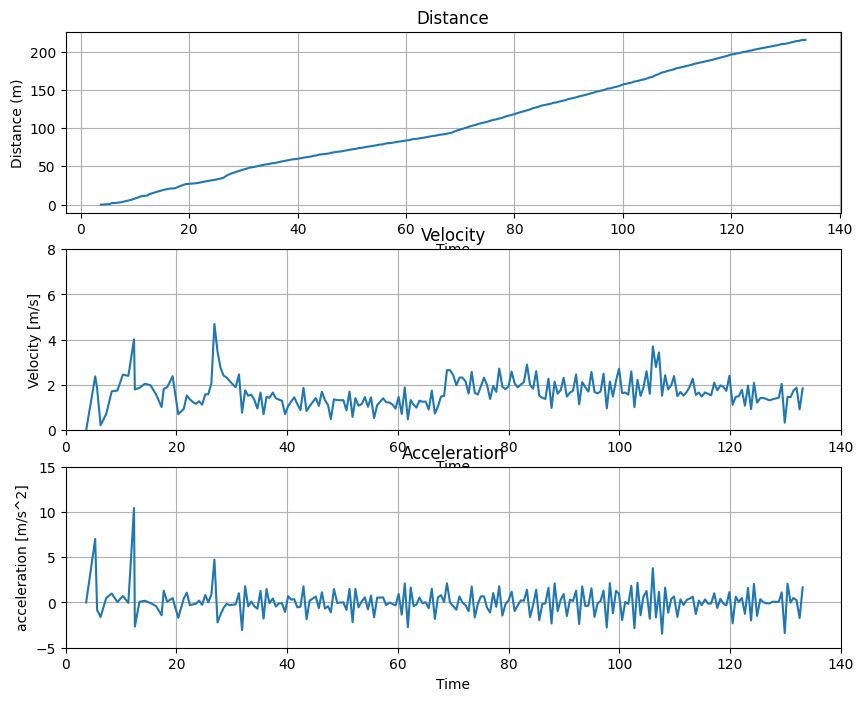

In [29]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(GPS_data['seconds_elapsed'],GPS_data['total_distance'])
#plt.plot(GPS_data['seconds_elapsed'],GPS_data['Speed (m/s)'])
#plt.legend(['velocity from GPS','velocity from app'])
plt.grid()
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Distance (m)')
#plt.axis([0,150,0,40])
####
plt.subplot(3,1,2)
plt.plot(GPS_data['seconds_elapsed'], GPS_data['velocity'])
#plt.plot(GPS_data['seconds_elapsed'], np.cumsum((GPS_data['dist'])))
plt.grid()
plt.title('Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity [m/s]')
plt.axis([0,140,0,8])

plt.subplot(3,1,3)
plt.plot(GPS_data['seconds_elapsed'], GPS_data['acceleration'])
#plt.plot(GPS_data['seconds_elapsed'], np.cumsum((GPS_data['dist'])))
plt.grid()
plt.title('Acceleration')
plt.xlabel('Time')
plt.ylabel('acceleration [m/s^2]')
plt.axis([0,140,-5,15])

print('The average velocity is', GPS_data['velocity'].mean(), 'm/s')
print('The total travel distance is', GPS_data['total_distance'].iloc[-1], 'm')


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Let's generate accelation

t1 = 0 #Start time
t2 = 100 #End time
dt = 0.1
time_vect = np.arange(t1,t2,dt) #Define a time vector
#time_vect
#Model signal or wanted signal\n
signal = np.sin(time_vect/2)
#Add noise to the signal
noise_level = 1 #Noise
bckround_max = 3 #Background level
#Create a noisy signal with background
noisy_signal = signal + (-(time_vect**2) + t2*time_vect)/(t2**2/4)*bckround_max + noise_level*np.random.rand(len(time_vect))

Acceleration_data = pd.read_csv('Acceleration_data.csv')
Acceleration_data.head()

,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


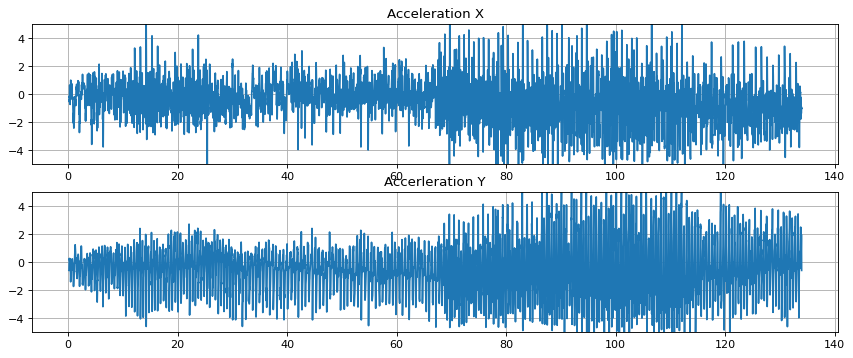

In [14]:
fig = plt.figure(num=None, figsize= (13, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(Acceleration_data['seconds_elapsed'],Acceleration_data['x'])
plt.grid()
plt.ylim(-5,5)
plt.title('Acceleration X')
plt.subplot(2,1,2)
plt.plot(Acceleration_data['seconds_elapsed'],Acceleration_data['y'])
plt.title('Accerleration Y')
plt.grid()
plt.ylim(-5,5)
plt.show()

      Unnamed: 0  seconds_elapsed         z         y         x  \
1              1         0.159217 -2.651466 -0.560432 -0.418557   
2              2         0.175117 -2.132024 -0.366186 -0.535990   
3              3         0.190986 -1.023350 -0.041039 -0.522485   
4              4         0.206763 -0.449766  0.229015 -0.356920   
5              5         0.222663 -0.719320  0.269587 -0.157878   
...          ...              ...       ...       ...       ...   
8441        8441       133.907827  5.114623  1.839526 -1.370973   
8442        8442       133.923635  1.925411  1.976759 -1.019807   
8443        8443       133.939474  0.877851  1.657148 -0.976474   
8444        8444       133.955343  2.747669  0.726561 -1.049844   
8445        8445       133.971151  4.901917 -0.585189 -0.953776   

      acceleration_x  acceleration_y  acceleration_z  
1           3.149423        1.365539       12.330431  
2          -7.385894       12.217033       32.670046  
3           0.851016       20.

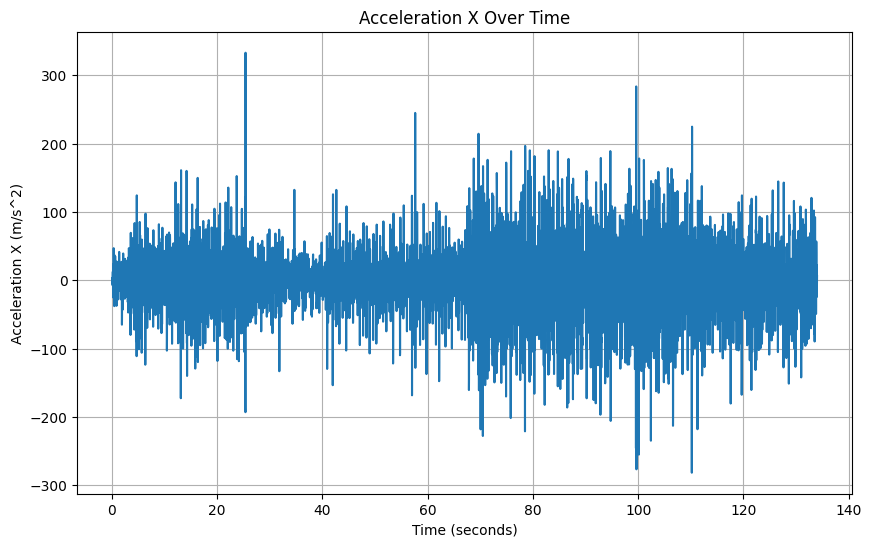

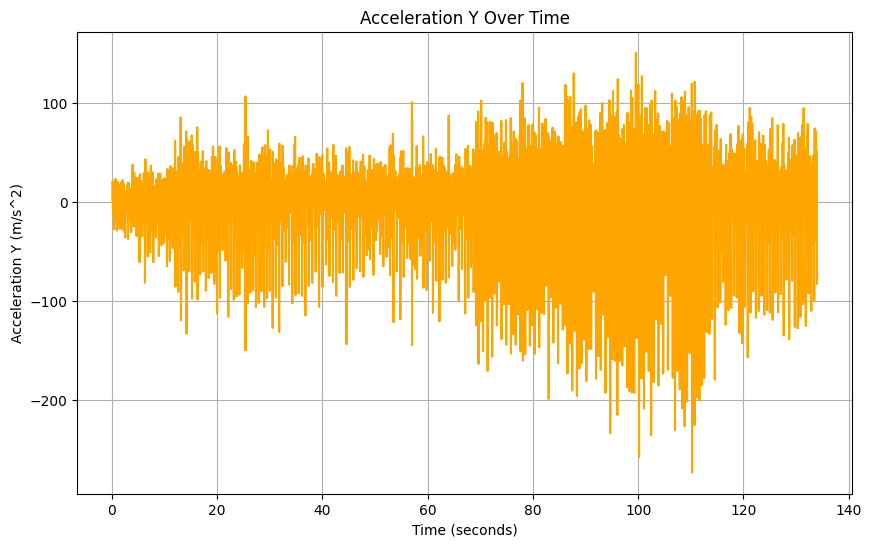

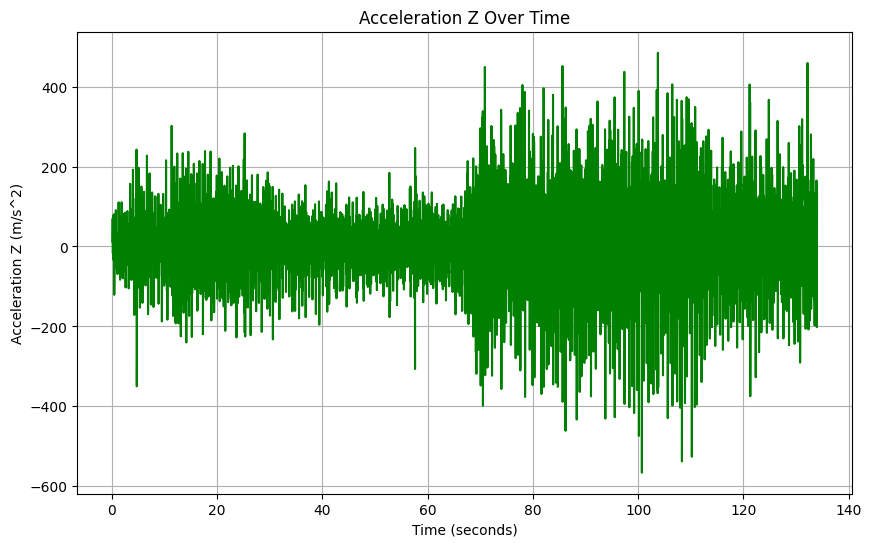

In [32]:
#import pandas as pd

# Load acceleration data
data = pd.read_csv("acceleration_data.csv")

# Calculate acceleration components
Acceleration_data['acceleration_x'] = Acceleration_data['x'].diff() / Acceleration_data['seconds_elapsed'].diff()
Acceleration_data['acceleration_y'] = Acceleration_data['y'].diff() / Acceleration_data['seconds_elapsed'].diff()
Acceleration_data['acceleration_z'] = Acceleration_data['z'].diff() / Acceleration_data['seconds_elapsed'].diff()

data['acceleration_x'] = Acceleration_data['x'].diff() / Acceleration_data['seconds_elapsed'].diff()
data['acceleration_y'] = Acceleration_data['y'].diff() / Acceleration_data['seconds_elapsed'].diff()
data['acceleration_z'] = Acceleration_data['z'].diff() / Acceleration_data['seconds_elapsed'].diff()

# Drop the first row which will have NaN values after differencing
Acceleration_data = Acceleration_data.dropna()

# Display the resulting dataframe
print(Acceleration_data)

import matplotlib.pyplot as plt

# Plot acceleration component X
plt.figure(figsize=(10, 6))
plt.plot(Acceleration_data['seconds_elapsed'], Acceleration_data['acceleration_x'])
plt.title('Acceleration X Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration X (m/s^2)')
plt.grid(True)
plt.show()

# Plot acceleration component Y
plt.figure(figsize=(10, 6))
plt.plot(Acceleration_data['seconds_elapsed'], Acceleration_data['acceleration_y'], color='orange')
plt.title('Acceleration Y Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration Y (m/s^2)')
plt.grid(True)
#plt.show()

# Plot acceleration component Z
plt.figure(figsize=(10, 6))
plt.plot(Acceleration_data['seconds_elapsed'], Acceleration_data['acceleration_z'], color='green')
plt.title('Acceleration Z Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration Z (m/s^2)')
plt.grid(True)
plt.show()

The number of steps is 0 steps


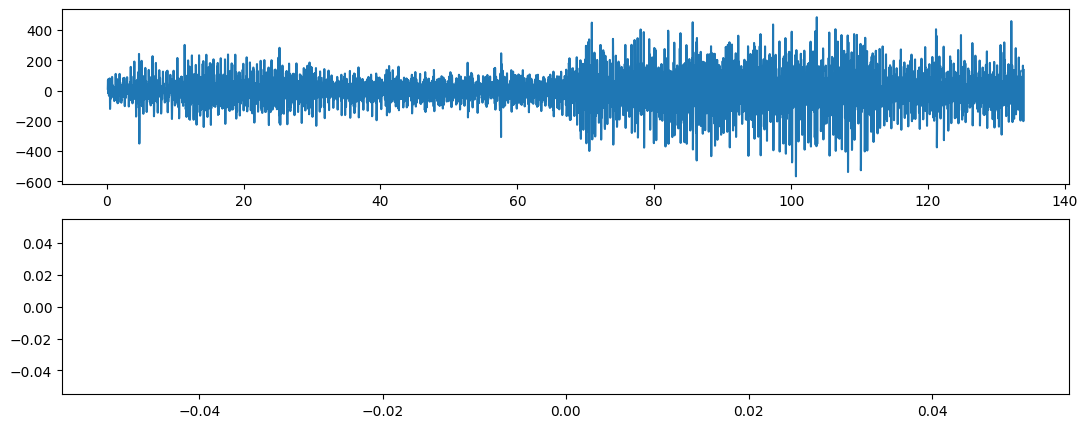

In [33]:
#filter data
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y
noisy_signal = data['acceleration_z']
time = data['seconds_elapsed']
order = 2
dt = (time[len(time)-1] - time[0])/len(time) #time is different from time_vect

fs = 1/dt # sampling rate
nyq = 0.5 * fs
cutoff_H = 1/5 # desired cutoff frequency of the filter, Hz
cutoff_L = 1/0.5 # desired cutoff frequency of the filter, Hz
#after this filter we will hane only frequencies from 1/40 and 1/5

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs,nyq, order)
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs,nyq, order)

plt.figure(figsize=(13, 5))
plt.subplot(2,1,1)
plt.plot(time, noisy_signal)
plt.subplot(2,1,2)
plt.plot(time, final_signal)

stepdata = final_signal
step = 0
for i in range(len(stepdata)-1):
    if stepdata[i]/stepdata[i+1] < 0 :
        step = step + 0.5
print('The number of steps is', step, 'steps')

In [34]:
# 7. The number of steps 
#read the data. 
import pandas as pd 
df = pd.read_csv('Acceleration_data.csv')
df.head() #check the first 5 rows
df.info() #check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8446 entries, 0 to 8445
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       8446 non-null   int64  
 1   seconds_elapsed  8446 non-null   float64
 2   z                8446 non-null   float64
 3   y                8446 non-null   float64
 4   x                8446 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 330.1 KB


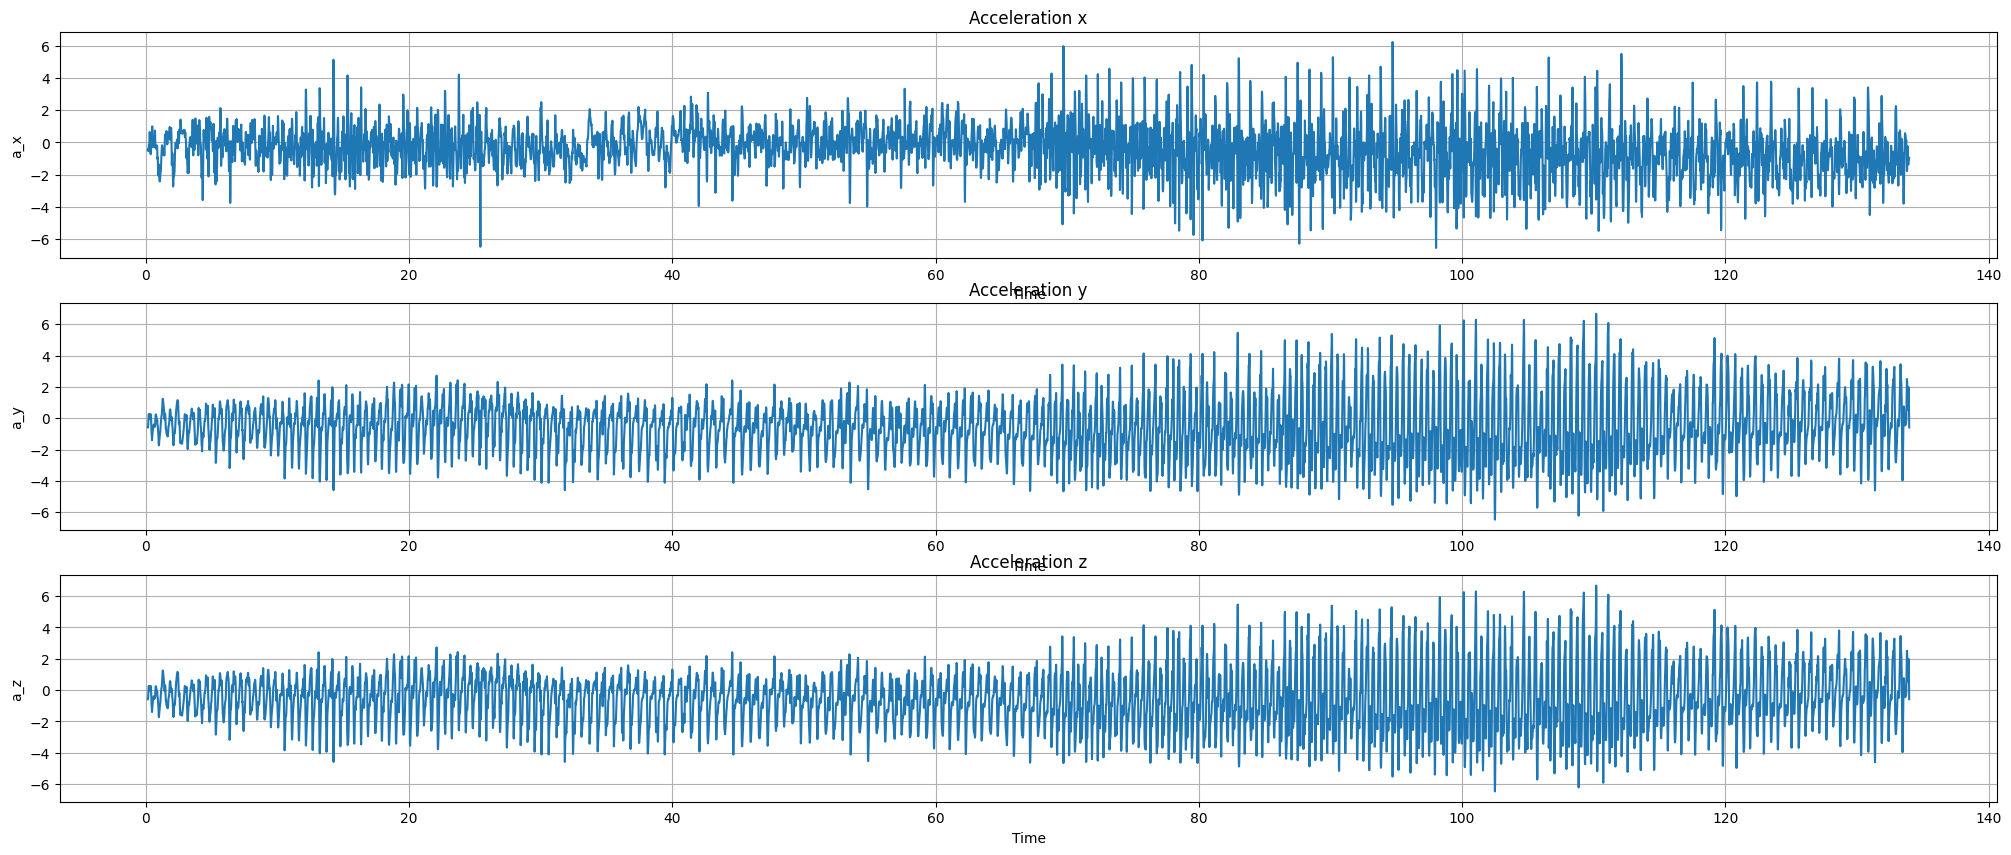

In [19]:
#make a simple graph
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10)) #set the size of the graph
plt.subplot(3,1,1) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['x']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration x') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_x') #set the y axis label

plt.subplot(3,1,2) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['y']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration y') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_y') #set the y axis label

plt.subplot(3,1,3) #3 rows, 1 column, 1st plot
plt.plot(df['seconds_elapsed'],df['y']) #plot the data, x vs y, respectively
plt.grid() #turn on the grid
plt.title('Acceleration z') #set the title
plt.xlabel('Time') #set the x axis label
plt.ylabel('a_z') #set the y axis label

plt.show() #show the plot

In [36]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

The total steps are 255.5 steps


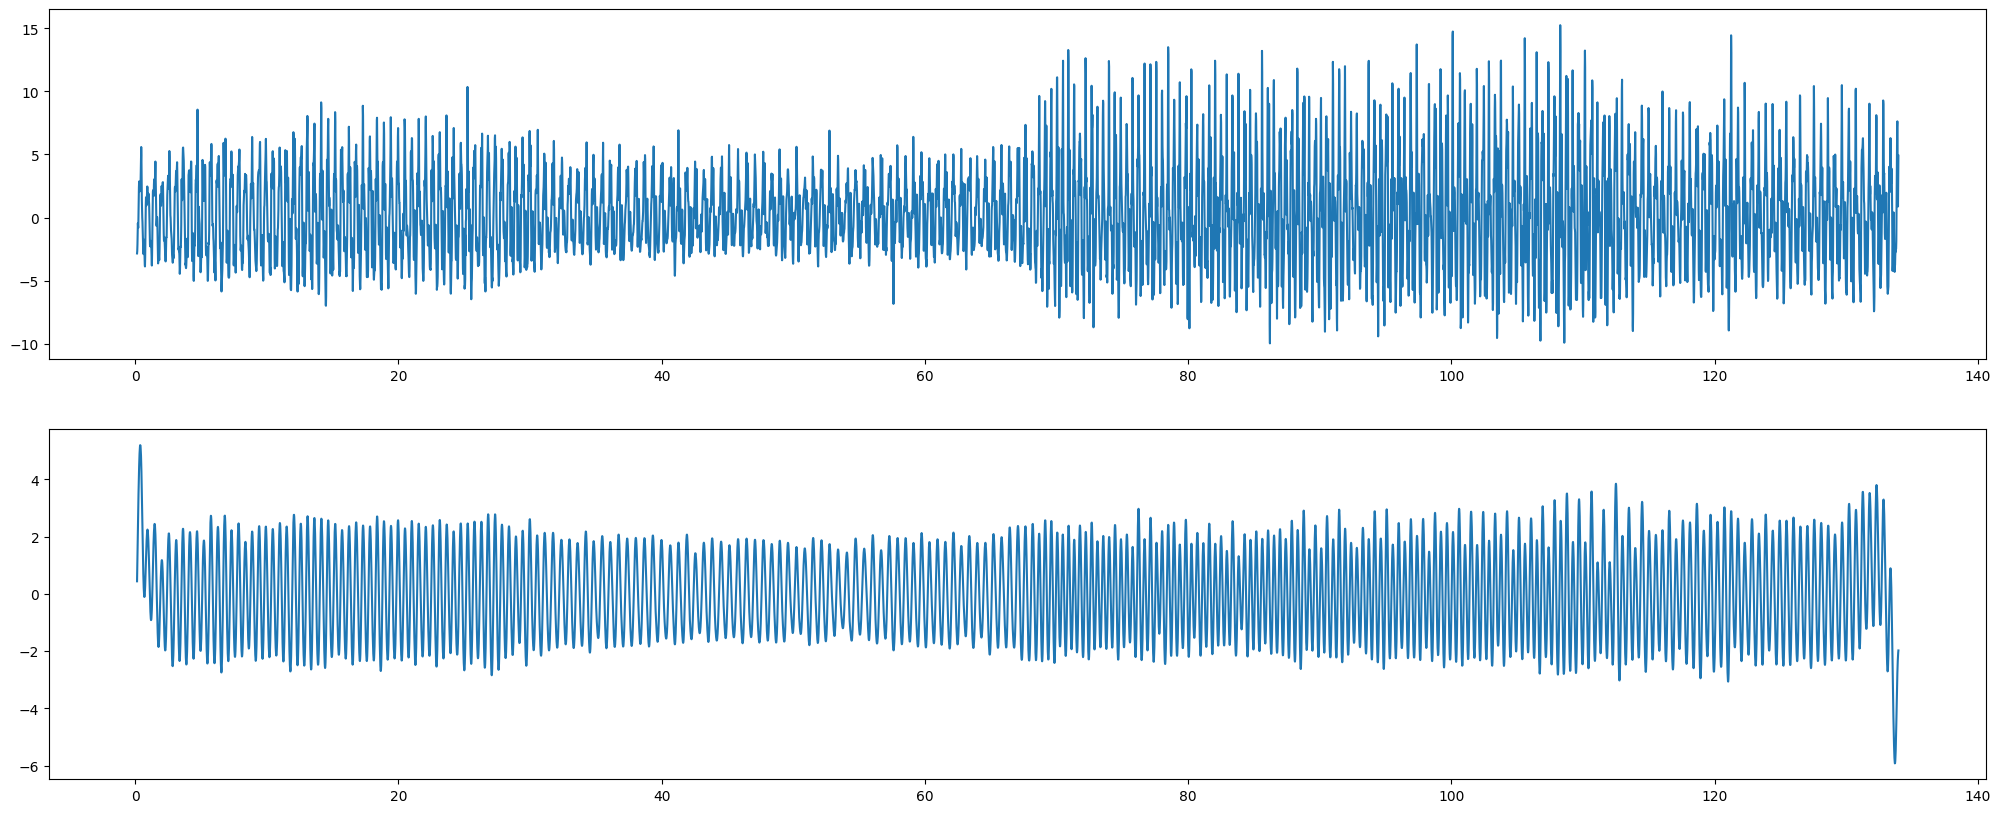

In [37]:
#filter the data
# select the components of the signal
noisy_signal = df['z'] #select the data
time = df['seconds_elapsed'] #select the time

order = 2
dt= (time[len(time) - 1] - time[0])/len(time) # time sampling interval
fs = 1/dt # sample rate, Hz
nyq = 0.5 * fs # Nyquist Frequency

cutoff_H = 1/5 # high pass cutoff frequency of the filter, Hz
cutoff_L = 1/0.5 # low pass cutoff frequency of the filter, Hz
#after this filtering we'll have only frequencies between 1/5 and 1/40 Hz

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order) #filter out high frequencies
final_signal = butter_highpass_filter(lowpass_filtered, cutoff_H, fs, nyq, order) #filter out low frequencies

plt.figure(figsize=(25,10)) #set the size of the graph
plt.subplot(2,1,1) #3 rows, 1 column, 1st plot
plt.plot(time,noisy_signal)
plt.subplot(2,1,2) #3 rows, 1 column, 1st plot
plt.plot(time,final_signal)

stepdata = final_signal
step = 0
for i in range(len(stepdata)-1):
    if stepdata[i]/stepdata[i+1] < 0 :
        step = step + 0.5
print('The total steps are', step, 'steps')